In [5]:
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd


def plot_roc_curve(y_test, y_proba_m1, y_proba_m2):
    """
    plot two models' ROC curve and compare their AUC value
    
    input:
    y_test: real class of test data (1 = positive, 0 = negative)
    y_proba_m1:  M1 prediction of positive proba
    y_proba_m2:  M2 prediction of positive proba
    """
    
    # 計算 M1 的 ROC 曲線
    fpr_m1, tpr_m1, _ = metrics.roc_curve(y_test, y_proba_m1)
    auc_m1 = metrics.roc_auc_score(y_test, y_proba_m1)
    
    # 計算 M2 的 ROC 曲線
    fpr_m2, tpr_m2, _ = metrics.roc_curve(y_test, y_proba_m2)
    auc_m2 = metrics.roc_auc_score(y_test, y_proba_m2)
    
    # 繪製 ROC 曲線
    plt.figure(figsize=(8, 6))
    
    plt.plot(fpr_m1, tpr_m1, color='blue', label=f'M1 ROC curve (AUC = {auc_m1:.2f})')
    plt.plot(fpr_m2, tpr_m2, color='green', label=f'M2 ROC curve (AUC = {auc_m2:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # 隨機猜測的基準線
    
    # 添加標題和標籤
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve Comparison between M1 and M2')
    plt.legend(loc="lower right")
    
    plt.grid(True)
    plt.show()


In [6]:
def load_and_plot_roc_curve(csv_file_path):
    # Load CSV file
    df = pd.read_csv(csv_file_path)
    
    # Convert 'True Class' to binary (1 for '+', 0 for '-')
    df['True Class Binary'] = df['True Class'].apply(lambda x: 1 if x == '+' else 0)

    # Extracting data for plotting
    y_test = df['True Class Binary']  # True labels
    y_proba_m1 = df['P(+|A,...,Z,M1)']  # Model M1 predicted probabilities
    y_proba_m2 = df['P(+|A,...,Z,M2)']  # Model M2 predicted probabilities

    # Call the ROC plot function
    plot_roc_curve(y_test, y_proba_m1, y_proba_m2)



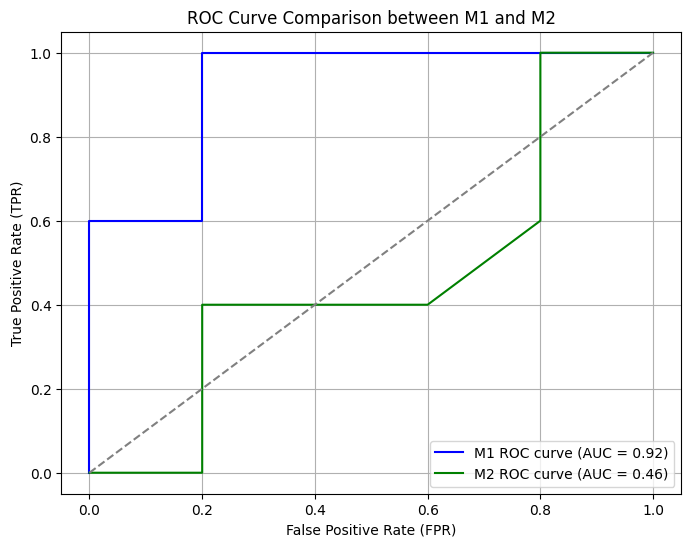

In [11]:
# Example of how to call the function with the file path
csv_file_path = 'posterior_probabilities_exercise_1.csv'  # Replace with the actual path to your CSV file

load_and_plot_roc_curve(csv_file_path)